<a href="https://colab.research.google.com/github/putriayualc/PCVK_Ganjil_2024/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


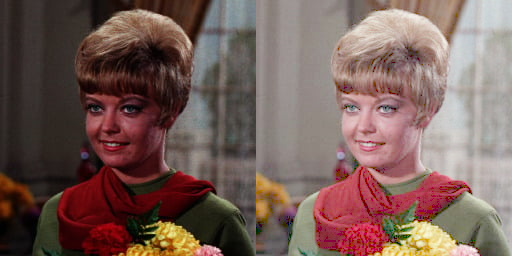

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg')
gamma_img = np.zeros (original.shape, original.dtype)

gamma_img = np.array(255 * (original / 255) ** (1 / gamma), dtype='uint8')

final_frame = cv.hconcat((original, gamma_img))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

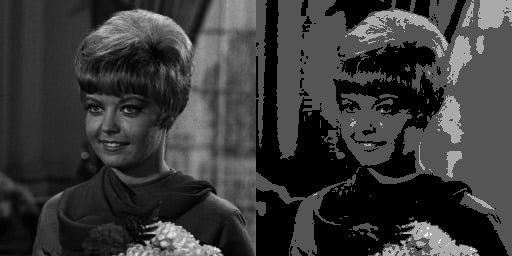

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

depth_image = np.round(original/level) * level
depth_image = depth_image.astype(np.uint8)
final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

In [4]:
import glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/img/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

In [3]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

In [5]:
def avg_denoising(imgs):
    height, width, channels = imgs[0].shape
    sum_img = np.zeros((height, width, channels))

    # Menjumlahkan setiap gambar
    for img in imgs:
        sum_img += img

    # Menghitung rata-rata citra
    average_image = sum_img / len(imgs)

    # Mengatur nilai pixel agar berada dalam rentang 0-255 dan mengubah tipe data
    avg_image = np.clip(average_image, 0, 255).astype(np.uint8)

    return avg_image

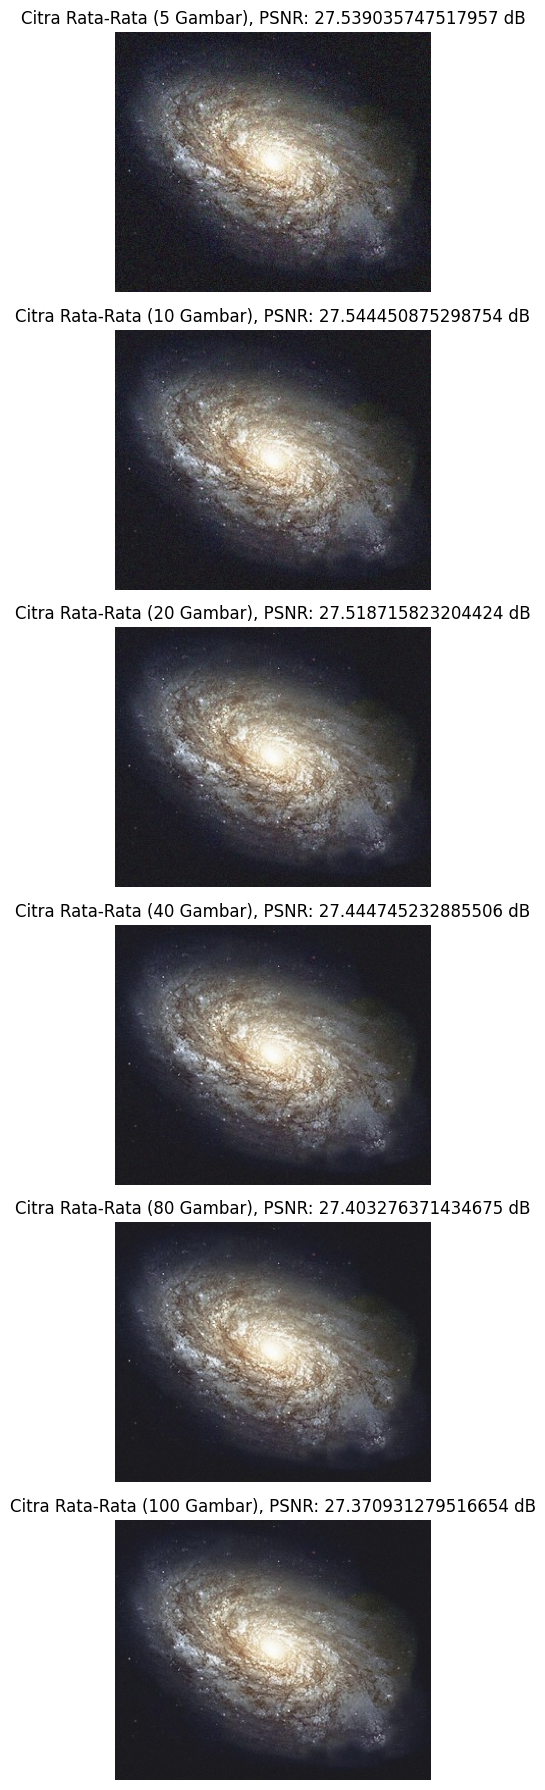

In [14]:
# Membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/img/galaxy.jpg')

# Daftar jumlah gambar yang ingin digunakan
num_images_list = [5, 10, 20, 40, 80, 100]

plt.figure(figsize=(20, 18))

for i, num_image in enumerate(num_images_list):
  avg_img = avg_denoising(cv_img[:num_image])
  # Menghitung nilai PSNR
  psnr_value = PSNR(original_img, avg_img)
  # Menampilkan gambar rata-rata
  plt.subplot(len(num_images_list), 1, i + 1)
  plt.imshow(cv.cvtColor(avg_img, cv.COLOR_BGR2RGB))
  plt.title(f'Citra Rata-Rata ({num_image} Gambar), PSNR: {psnr_value} dB')
  plt.axis('off')

plt.tight_layout()
plt.show()


4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya

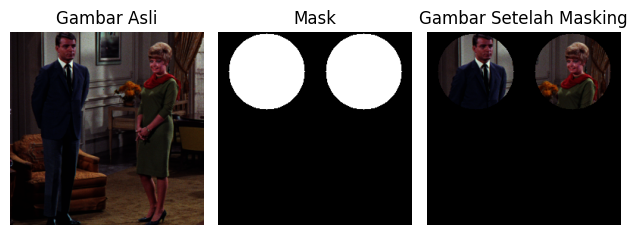

In [27]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')

# Mendapatkan dimensi gambar
height, width = ori.shape[:2]

# Membuat mask berbentuk lingkaran (di tengah gambar)
mask = np.zeros((height, width), dtype=np.uint8)
cv.circle(mask, center=(int(width*0.25),53), radius=50, color=255, thickness=-1)
cv.circle(mask, center=(int(width*0.75), 53), radius=50, color=255, thickness=-1)

masked_image = cv.bitwise_and(ori, ori, mask=mask)

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(ori, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(masked_image, cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Masking')
plt.axis('off')

plt.tight_layout()
plt.show()


5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

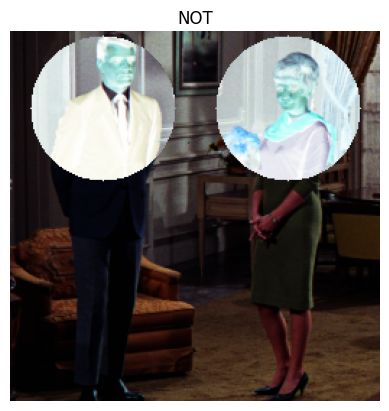

In [40]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')
masked_not = cv.bitwise_not(ori, ori, mask=mask)

plt.imshow(cv.cvtColor(masked_not, cv.COLOR_BGR2RGB))
plt.title('NOT')
plt.axis('off')
plt.show()

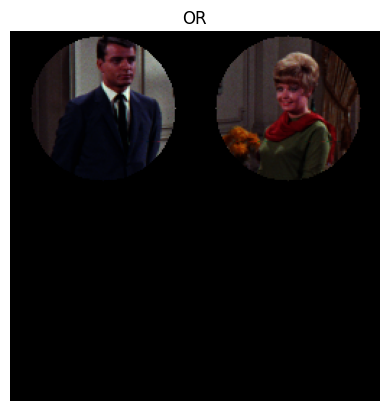

In [48]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')
masked_or = cv.bitwise_or(ori, ori, mask=mask)

plt.imshow(cv.cvtColor(masked_or, cv.COLOR_BGR2RGB))
plt.title('OR')
plt.axis('off')
plt.show()

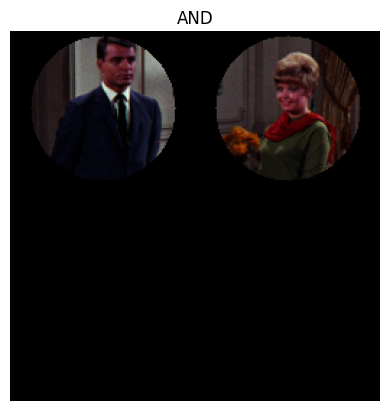

In [49]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')
masked_and = cv.bitwise_and(ori, ori, mask=mask)

plt.imshow(cv.cvtColor(masked_and, cv.COLOR_BGR2RGB))
plt.title('AND')
plt.axis('off')
plt.show()

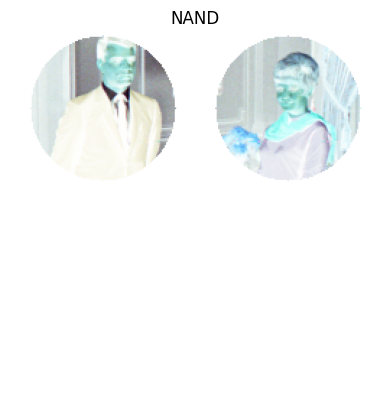

In [51]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')
# Menghitung hasil NAND dengan NOT dari AND
masked_nand = cv.bitwise_not(masked_and)

plt.imshow(cv.cvtColor(masked_nand, cv.COLOR_BGR2RGB))
plt.title('NAND')
plt.axis('off')
plt.show()

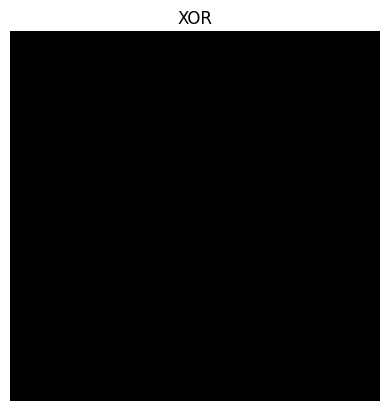

In [52]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')
masked_xor = cv.bitwise_xor(ori, ori, mask=mask)

plt.imshow(cv.cvtColor(masked_xor, cv.COLOR_BGR2RGB))
plt.title('XOR')
plt.axis('off')
plt.show()